In [3]:
import pickle
import pandas as pd
import numpy as np

In [4]:
with open("/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/grn/Results/regulons_dict.pkl", "rb") as f:
    modules = pickle.load(f)

In [66]:
modules['ER']

[Regulon(name='AR', gene2weight=frozendict.frozendict({'LCOR': 2.1693664365338563, 'ANKEF1': 0.5017534957737135, 'OSBPL1A': 2.1369675993664505, 'DENND5B': 0.098241116763999, 'VWA2': 0.7582861277232971, 'LPGAT1': 1.3877106608883851, 'MSX2': 1.321687359952049, 'RUFY2': 0.5292587416819899, 'ICA1': 3.005855846140528, 'ESRRG': 1.4410954954838229, 'CBWD5': 1.8183616728344096, 'SIL1': 1.0728045604347072, 'RSPH3': 1.5462300216215634, 'PRRC2A': 1.3301616724235206, 'ZNF680': 2.221518368199688, 'PRKAG2': 1.9714824935502009, 'USP13': 0.5386990021348059, 'CACUL1': 1.6113447546710569, 'ABLIM1': 1.5948610045391558, 'RERE': 2.206115989203892, 'TNRC18': 1.6806411009972342, 'BCKDHB': 0.8616078615137363}), gene2occurrence=frozendict.frozendict({}), transcription_factor='AR', context=frozenset({'metacluster_188.4.png', 'activating'}), score=3.568339999408165, nes=0.0, orthologous_identity=0.0, similarity_qvalue=0.0, annotation=''),
 Regulon(name='ATF3', gene2weight=frozendict.frozendict({'NLRP3': 0.426079

In [30]:
tfs = []
for reg in modules['ER']:
    tfs.append(reg.name)

In [55]:
tfs[:5]

['AR', 'ATF3', 'ATF4', 'BATF', 'CEBPA']

In [34]:
if len(tfs) == len(set(tfs)): 
    print('All Tfs are unique')
else:
    print('There are duplicated TFs')

All Tfs are unique


In [57]:
gene_list = []
for reg in modules['ER']:
    genes = reg.gene2weight.keys()
    for gen in genes:
        gene_list.append(gen)

gene_list = list(set(gene_list))

In [59]:
gene_list[:5]

['ZNF384', 'ERO1A', 'VCAM1', 'MRPL55', 'CCDC151']

In [60]:
df = pd.DataFrame(0.0, index=tfs, columns=gene_list)


In [71]:
gene_list = []
for reg in modules['ER']:
    TF = reg.name
    for gene, importance in reg.gene2weight.items():
        df.loc[TF,gene] = importance
    

In [81]:
df.apply(lambda x: x != 0, axis = 0).sum(axis = 1).min() # Min genes in a regulon

10

In [94]:
df.apply(lambda x: x != 0, axis = 0).sum(axis = 1).max() # Min genes in a regulon

2610

<AxesSubplot: >

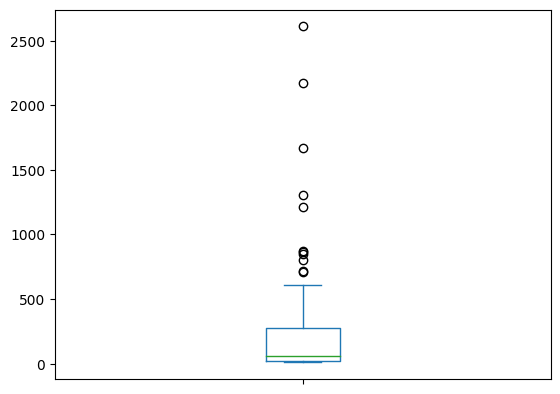

In [120]:
df.apply(lambda x: x != 0, axis = 0).sum(axis = 1).plot.box()

In [141]:
all_importances = df.values.flatten()[df.values.flatten() != 0]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.histplot(all_importances, bins=50, kde=True)
plt.title("Global Distribution of Nonzero Importance Scores")
plt.xlabel("Importance Score")
plt.ylabel("Frequency")
plt.show()


In [144]:
df = np.log1p(df)

In [148]:
df

,ZNF384,ERO1A,VCAM1,MRPL55,CCDC151,C4B,RDH11,GNPAT,NDUFB1,TLCD2,...,IL18R1,MYH11,NRGN,HHAT,PEPD,CEP350,GMFB,SRC,TPM2,ITGAM
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATF3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATF4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BATF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CEBPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZNF285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZNF354C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZNF791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


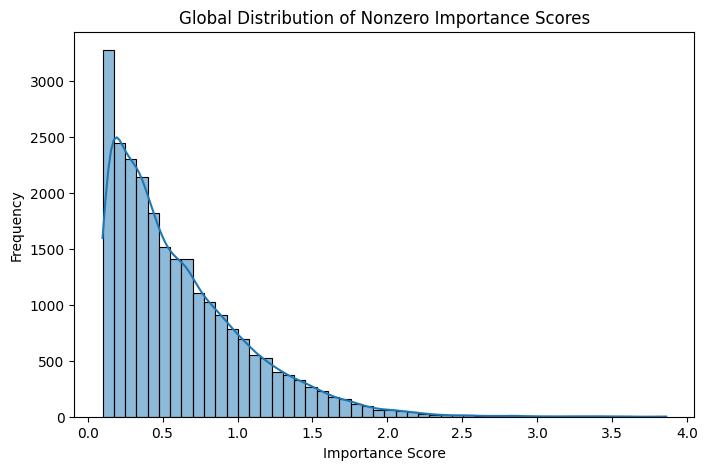

In [149]:
all_importances = df.values.flatten()[(df.values.flatten() != 0) & (df.values.flatten() > 0.1)]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.histplot(all_importances, bins=50, kde=True)
plt.title("Global Distribution of Nonzero Importance Scores")
plt.xlabel("Importance Score")
plt.ylabel("Frequency")
plt.show()


In [152]:
df_scaled = df.apply(lambda col: (col - col.mean()) / col.std(), axis=0)

In [24]:
modules['ER'][1].gene2weight.values()

frozendict.values([0.4260791180018065, 1.8038860172373048, 1.1011550109906587, 1.1429332410845066, 2.6362361573219566, 0.983356577339198, 1.0213656486567368, 1.4540554807858377, 1.538634697856384, 0.8496445165515043, 1.146940042993327, 2.025868411012876, 0.413804396522248, 0.5467995700311843, 0.7807421520706977, 1.0, 3.930166000241415, 0.3823830540913897, 0.5624581501494358, 0.4666594126776, 0.6092103327025165, 0.3408363552839019, 1.518506688263339, 0.6819585387483933, 0.4430034537467526, 1.1638190911557469, 0.4181065493911161, 19.11735038542857, 0.8025545418117659, 1.2012213854125071, 0.4591986413723133, 0.4347567585987423, 2.894958336805966, 2.613212229070605, 0.4155338286244876, 10.035975782422884, 2.805886372989692, 1.6649961062373215, 0.3396261948387316, 0.5580385820592508, 3.2933801402413936, 1.7098133900003345, 0.508629265178605, 1.7005798837686676, 0.3789135518567637, 0.4392811785604031, 1.2929100694467834, 7.763332745812815, 1.5559020082663435, 0.4303242401605204, 0.3501180064

In [62]:
with open("/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/grn/Results/modules_dict.pkl", "rb") as f:
    mod = pickle.load(f)

In [64]:
mod['ER']

,TF,target,importance
0,AEBP1,COL6A3,5.526044e+01
1,AEBP1,COL1A2,5.316217e+01
2,AEBP1,COL1A1,5.213108e+01
3,AEBP1,CALD1,5.007261e+01
4,JUN,FOS,4.643524e+01
...,...,...,...
1317000,LCOR,NDUFAF7,2.572469e-17
1317001,ZNF721,DIS3L2,2.527148e-17
1317002,SOX4,GPR82,2.337089e-17
1317003,KLF4,VIPAS39,2.238731e-17
